In [34]:
## Aditya Agre
# 121B1B006
## ML assignment 3

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

In [71]:
## Making sample data
data = {
    'S1' : [2,4,4,4,6,6],
    'S2' : [4,6,4,2,4,2],
    'Class': ["neg","neg", "pos", "neg","neg", "pos"]
}

import pandas as pd
df = pd.DataFrame(data)

In [72]:
y = df['Class']
X = df.drop(columns = ['Class'])
print(type(X))
for i in X:
    print(type(i), i)

<class 'pandas.core.frame.DataFrame'>
<class 'str'> S1
<class 'str'> S2


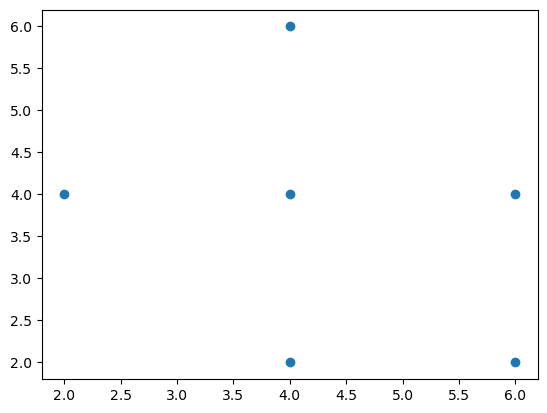

In [73]:
## Visualising data
import matplotlib.pyplot as plt
plt.scatter(data['S1'], data['S2'])
plt.show()

/Users/adityaagre/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


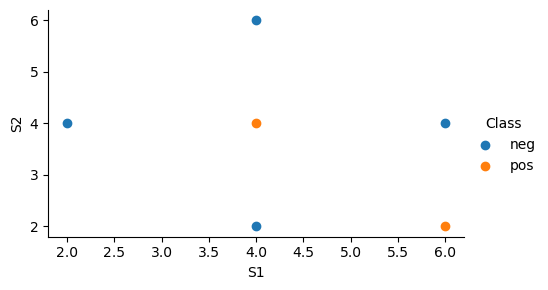

In [81]:
fg = sns.FacetGrid(data=df, hue='Class', aspect=1.61)
fg.map(plt.scatter, 'S1', 'S2').add_legend()

In [51]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.69774938  0.24253563]
 [-0.24253563  1.69774938]
 [-0.24253563  0.24253563]
 [-0.24253563 -1.21267813]
 [ 1.21267813  0.24253563]
 [ 1.21267813 -1.21267813]]


In [39]:
## Finding the best k value using elbow method
k_list = []
acc_list = []
for i in range(1, 7, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model = KNeighborsClassifier(n_neighbors=k)
  ## score = cross_val_score(knn_model, X_scaled, y, cv=5)
  knn_model.fit(X_scaled, y)
  y_pred = knn_model.predict(X_scaled)
  accuracy = accuracy_score(y, y_pred)
  k_list.append(k)
  acc_list.append(accuracy)
  print("Accuracy after considering ", k, " neighbours: ", accuracy)  

  #k_list.append(k)
  #acc_list.append(score)
  #print("Accuracy after considering ", k, " neighbours: ", score, np.average(score))

Accuracy after considering  1  neighbours:  1.0
Accuracy after considering  3  neighbours:  0.3333333333333333
Accuracy after considering  5  neighbours:  0.6666666666666666


In [40]:
## best performance for 5 neighbours.
## Question specifies using 3 neighbours
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_scaled, y)
y_pred = knn_model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100)

33.33333333333333


In [41]:
# Weighted KNN
## In weighted kNN, the nearest k points are given a weight using a function called as the kernel function. 
##The intuition behind weighted kNN, is to give more weight to the points which are nearby and less weight 
## to the points which are farther away. Any function can be used as a kernel function for the weighted knn 
## classifier whose value decreases as the distance increases. The simple function which is used is the 
## inverse distance function.
## https://media.geeksforgeeks.org/wp-content/uploads/20190613174426/Formula2.jpg

In [42]:
knn_model2 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_model2.fit(X_scaled, y)
y_pred = knn_model2.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100)

100.0


In [43]:
## Therefore, KNN algorithm for 3 neighbors gives an accuracy of 33% while KNN 
## weighed by distance gives 100% accuracy.

In [83]:
## predicting for sample {6,6}
## Input values saled for training model. 
## This sample must also be scaled.
## To use the same level of scaling, use the same scaling object that we had fit to out data.
sample = np.array([6,6])
table = pd.DataFrame([sample])
print(table)
scaled_table = scaler.fit_transform(table)
print(scaled_table)

   0  1
0  6  6
[[0. 0.]]


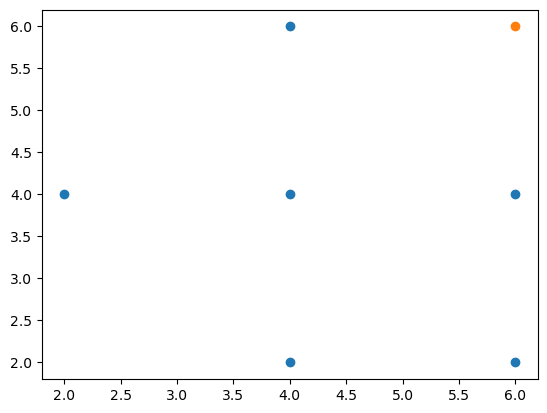

In [88]:
## Plotting given point with training points
## Visualising data
import matplotlib.pyplot as plt
plt.scatter(data['S1'], data['S2'])
plt.scatter(6,6)
plt.show()

In [62]:
pred_1 = knn_model.predict(scaled_table)
print(pred_1)

['neg']


In [63]:
pred_2 = knn_model2.predict(scaled_table)
print(pred_2)

['pos']


In [ ]:
## Model 1 predicts Negative class while model 2 predicts positive class.